<a href="https://colab.research.google.com/github/vishnubalaji/Deep-Learning-using-PyTorch/blob/main/Deep_Learning_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice ( Loading data from MNIST , training, testing, validating and displaying using helper module)

In [ ]:
# First and foremost step, import all the packages and necessary classes

%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn,optim
from torch.nn import functional as F

In [ ]:
# Importing all the datasets and splitting it into training and testing

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
# Creating the neural network class

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x):
        x=x.view(x.shape[0],-1)
        
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.log_softmax(self.fc4(x),dim=1)
        
        return x

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

epochs = 5
steps = 0

train_losses, test_losses = [],[]
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            for images,labels in testloader:
                log_ps = model(images)
                test_loss+=criterion(log_ps,labels)
                
                ps = torch.exp(log_ps)
                top_p,top_class = ps.topk(1,dim=1)
                equals = top_class==labels.view(top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch {} ".format(e+1),'Training Loss : {} '.format(train_losses[-1]),'Testing Loss {} '.format(test_losses[-1]),'Test Accuracy : {}'.format(accuracy/len(testloader)))

Epoch 1  Training Loss : 0.5139834978846091  Testing Loss 0.49503496289253235  Test Accuracy : 0.8215565085411072
Epoch 2  Training Loss : 0.3898848300930788  Testing Loss 0.40840640664100647  Test Accuracy : 0.8563893437385559
Epoch 3  Training Loss : 0.3565350735921468  Testing Loss 0.4250194728374481  Test Accuracy : 0.8498208522796631
Epoch 4  Training Loss : 0.3332956908211144  Testing Loss 0.3989698886871338  Test Accuracy : 0.8664410710334778
Epoch 5  Training Loss : 0.31706569609103175  Testing Loss 0.38199135661125183  Test Accuracy : 0.8650477528572083


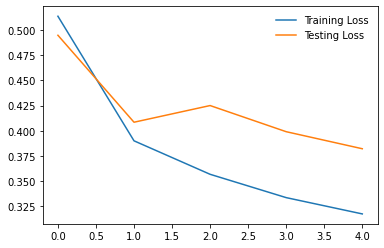

In [ ]:
# Plot the training and testing loss

plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Testing Loss')
plt.legend(frameon=False)

tensor([[8.6132e-13, 1.5686e-13, 6.5408e-15, 4.4691e-13, 2.0139e-13, 4.6194e-03,
         2.8864e-12, 9.9529e-01, 6.4153e-09, 8.7639e-05]]) 
 <built-in method type of Tensor object at 0x7f253cab8900> 



<BarContainer object of 10 artists>

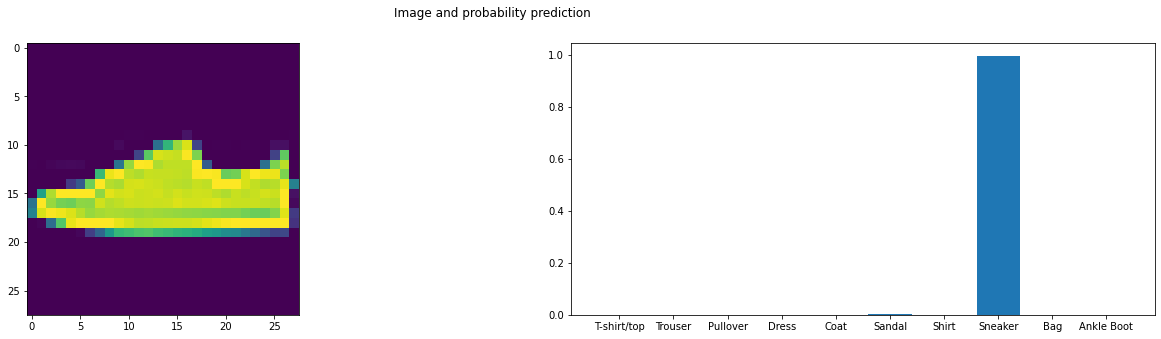

In [ ]:
# find the probabilities and display the output of the model

model.eval()
dataiter = iter(testloader)
images,labels = dataiter.next()

img = images[0]
img = img.view(1,784)
with torch.no_grad():
    output = model(img)

labels_string = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
img = img.view(1,28,28).numpy().squeeze()
fig , (ax1 , ax2) = plt.subplots(figsize=(23,5),ncols=2)
fig.suptitle('Image and probability prediction')
ax1.imshow(img)
output_prob = torch.exp(output)
print(output_prob,'\n',output_prob.type,'\n')
output_prob = output_prob.numpy().squeeze()
ax2.bar(labels_string,output_prob)
# print(output_prob)
# helper.view_classify(img.view(1,28,28),output_prob)

#Saving and Loading Deep Learning Network models

In [ ]:
# print('My model\n',model)
# print('Model state dict keys\n',model.state_dict().keys())

torch.save(model.state_dict(),'Neural_Mind.pth')

In [ ]:
state_dict_=torch.load('Neural_Mind.pth')
state_dict_.keys()

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])

In [ ]:
model.load_state_dict(state_dict_)
# print(model.state_dict())
# print(model.state_dict().values())

<All keys matched successfully>

# Loading image data of cats and dogs

In [ ]:
# First and foremost step, import all the packages and necessary classes

%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn,optim
from torch.nn import functional as F

In [ ]:
transform = transforms.Compose([transforms.Resize(255),transforms.CenterCrop(224),transforms.ToTensor()])
dataset = datasets.ImageFolder('Cat_Dog_data/train',transform=transform)

#Python Engineer PyTorch Tutorial Workouts

###1. Gradient Calculation With Autograd

In [ ]:
import torch
sample = torch.randn(3,dtype=torch.float16)  # Creating a random array/list of tensors of size 3 and datatype torch.float16
# print(sample)

# Implementing autograd
# b = torch.randn(3,requires_grad=True)
b = torch.tensor([1,2,3],dtype=torch.float16,requires_grad=True)
print('Values of b are ',b)
c = b*2
print('Values of c are ',c)
z = c.mean()
print('Mean of c is ',z)
# v = torch.tensor([1,1,1],dtype=torch.float16)
z.backward()
print('Gradient of b are ',b.grad)

Values of b are  tensor([1., 2., 3.], dtype=torch.float16, requires_grad=True)
Values of c are  tensor([2., 4., 6.], dtype=torch.float16, grad_fn=<MulBackward0>)
Mean of c is  tensor(4., dtype=torch.float16, grad_fn=<MeanBackward0>)
Gradient of b are  tensor([0.6665, 0.6665, 0.6665], dtype=torch.float16)


### 1.1. Without using Autograd

In [ ]:
# Without using autograd

b.requires_grad_(False)
print(b)

b = b.detach()
print(b)

with torch.no_grad():
  print(b+1)

# Once you come out of torch.no_grad(), requirs_grad becomes True --> check it out print(b)

tensor([2., 3., 4.], dtype=torch.float16)
tensor([1., 2., 3.], dtype=torch.float16, requires_grad=True)


###1.2. Clearing the accumulated gradients

In [ ]:
# Clearing the gradients accumulated

print(b.grad)
b.grad.zero_()
print(b.grad)

tensor([0.6665, 0.6665, 0.6665], dtype=torch.float16)
tensor([0., 0., 0.], dtype=torch.float16)


#2. Backpropogation in MLP


In [ ]:
import torch

x=torch.tensor([1],dtype=torch.float16) # Input parameter (x)
y=torch.tensor([3],dtype=torch.float16) # Expected output (y) or correct output

weight=torch.tensor([2],dtype=torch.float16,requires_grad=True) # Input weights for the input parameter x

# Forward Pass of the MLP

y_hat=x*weight  # Output got by executing the input and the weight parameters
print('Actual output : ',y_hat)

# Determining the loss
loss=(y_hat-y)*(y_hat-y)
print('Loss : ',loss)

# Backward pass
loss.backward()
print('Gradients of weight : ',weight.grad)


Actual output :  tensor([2.], dtype=torch.float16, grad_fn=<MulBackward0>)
Loss :  tensor([1.], dtype=torch.float16, grad_fn=<MulBackward0>)
Gradients of weight :  tensor([-2.], dtype=torch.float16)


#3. Gradient Descent with Autograd and Backpropagation

###3.1. Gradient Descent using numpy

In [ ]:
import numpy as np

# Function is f = 2*x
x_input=np.array([1,2,3],dtype=np.float16)
y_output=np.array([2,4,6],dtype=np.float16) # Original output

# print(x)
# print(y)
ww=0.0

def forward(input):
  return ww*input

def loss(output,output_predicted):
  return ((output_predicted-output)*(output_predicted-output)).mean()

# MSE = 1/N*(w*x-y)**2
# dJ/dw = 1/N*(w*x-y)*2x

def gradient(input,output,output_predicted):
  return (np.dot(2*input,output_predicted-output)).mean()

print('Prediction before training : ',forward(x_input),'Output Expected : ',y_output)

epochs = 10
learning_rate = 0.01

for i in range(epochs):
  y_pred = forward(x_input) # Prediction

  l = loss(y_output,y_pred)  # Loss

  dw = gradient(x_input,y_output,y_pred)  # Gradients

  ww-=learning_rate*dw  # Updating weights

  print('Epoch : ',i+1,'\tLoss : ',l)
print('Prediction after training : ',forward(x_input),'Output Expected : ',y_output)

Prediction before training :  [0. 0. 0.] Output Expected :  [2. 4. 6.]
Epoch :  1 	Loss :  18.67
Epoch :  2 	Loss :  9.68
Epoch :  3 	Loss :  5.02
Epoch :  4 	Loss :  2.598
Epoch :  5 	Loss :  1.351
Epoch :  6 	Loss :  0.6978
Epoch :  7 	Loss :  0.362
Epoch :  8 	Loss :  0.188
Epoch :  9 	Loss :  0.0975
Epoch :  10 	Loss :  0.05075
Prediction after training :  [1.925 3.85  5.773] Output Expected :  [2. 4. 6.]


###3.2. Gradient Descent using pytorch

In [ ]:
import torch


# Function is f = 2*x
x_input=torch.tensor([1,2,3],dtype=torch.float16)
y_output=torch.tensor([2,4,6],dtype=torch.float16) # Original output

# print(x)
# print(y)
ww=torch.tensor(0,dtype=torch.float16,requires_grad=True)

def forward(input):
  return ww*input

def loss(output,output_predicted):
  return ((output_predicted-output)*(output_predicted-output)).mean()

# MSE = 1/N*(w*x-y)**2
# dJ/dw = 1/N*(w*x-y)*2x

print('Prediction before training : ',forward(x_input),'Output Expected : ',y_output)

epochs = 1000
learning_rate = 0.05

for i in range(epochs):
  y_pred = forward(x_input) # Prediction

  l = loss(y_output,y_pred)  # Loss

  l.backward()  # Gradients

  with torch.no_grad():
    
    ww-=learning_rate*ww.grad  # Updating weights
  
  ww.grad.zero_()  # Zero the gradients
  #print('Epoch : ',i+1,'\tLoss : ',l)
print('Prediction after training : ',forward(x_input),'Output Expected : ',y_output)


###3.3. Training Pipeline : Model, Loss, Optimizer

In [ ]:
import torch
import torch.nn as nn

# Function is f = 2*x

x_input=torch.tensor([[1],[2],[3]],dtype=torch.float32)
y_output=torch.tensor([[2],[4],[6]],dtype=torch.float32) # Original output
# print(x_input.shape)

n_samples,n_features=x_input.shape
input_shape = n_features
output_shape = n_features

# print(x)
# print(y)

# ww=torch.tensor(0,dtype=torch.float32,requires_grad=True)

model = nn.Linear(input_shape,output_shape)


# def loss(y,y_pred):
#   return ((y-y_pred)*(y-y_pred)).mean()

# MSE = 1/N*(w*x-y)**2
# dJ/dw = 1/N*(w*x-y)*2x

print('Prediction before training : ',model(x_input),'\nOutput Expected : ',y_output)

epochs = 1000
learning_rate = 0.05
criterion=nn.MSELoss()

optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for i in range(epochs):
  y_predicted =  model(x_input) # Prediction
  # print(y_pred)

  loss_model = criterion(y_output,y_predicted)  # loss(y_output,y_predicted)  #criterion(y_output,y_pred)  # Loss
  # print(loss_model)

  loss_model.backward()  # Gradients

  with torch.no_grad():
    
    optimizer.step()  # Updating weights
  
  optimizer.zero_grad()  # Zero the gradients
  # print('Epoch : ',i+1,'\tLoss : ',loss_model.item())
print('\nPrediction after training : ',model(x_input),'\nOutput Expected : ',y_output)



Prediction before training :  tensor([[-0.7691],
        [-1.7057],
        [-2.6423]], grad_fn=<AddmmBackward>) 
Output Expected :  tensor([[2.],
        [4.],
        [6.]])

Prediction after training :  tensor([[2.0000],
        [4.0000],
        [6.0000]], grad_fn=<AddmmBackward>) 
Output Expected :  tensor([[2.],
        [4.],
        [6.]])


#4. Linear Regression

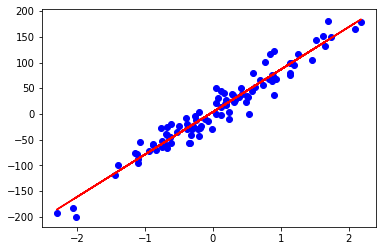

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets as ds
import matplotlib.pyplot as plt

# 1) Model
# 2) Loss and optimizer
# 3) Training loop

x_numpy,y_numpy = ds.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

x=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

# print(x)


# print(y.shape[0])
y=y.view(y.shape[0],1)
# print(y.shape)
# print(y)
n_samples,n_features=x.shape
# print(n_samples,n_features)

input_size=n_features
output_size=n_features

model=nn.Linear(input_size,output_size)
criterion=nn.MSELoss()
learning_rate=0.005
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

epochs=1000
# print('Before training : ',model(x))

for i in range(epochs):
  y_predicted=model(x)
  loss=criterion(y,y_predicted)
  
  loss.backward()

  with torch.no_grad():
    optimizer.step()

  optimizer.zero_grad()
  # print('Loss is : ',loss.item())

output=model(x).detach().numpy()

plt.scatter(x_numpy,y_numpy,c='b')
plt.plot(x_numpy,output,c='r')
# print('After training : ',model(x))

#5. Logistic Regression

In [ ]:
import torch
import torch.nn as nn

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

bc = datasets.load_breast_cancer()
# print(bc.keys())  # dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
x,y=bc.data,bc.target

n_samples,n_features=x.shape
# print(n_samples,n_features)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

x_train=torch.from_numpy(x_train.astype(np.float32))
x_test=torch.from_numpy(x_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))

y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

# f=wx+b , apply sigmoid at the end

class LogisticRegression(nn.Module):
  def __init__(self,input_features):
    super(LogisticRegression,self).__init__()
    self.linear=nn.Linear(input_features,1)
  
  def forward(self,x):
    y_predicted=torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)
criterion = nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.05)

epochs=100

for i in range(epochs):
  y_pred=model(x_train)

  loss=criterion(y_pred,y_train)

  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  if (i+1)%10 ==0:
    print('Loss : ',loss.item())

with torch.no_grad():
  y_predicted=model(x_test)

  y_predicted_cls = y_predicted.round()
  acc=y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])

  # print('Accuracy of the model is : ',acc.item())
  print(f'Accuracy is : {acc.item()*100:.4f}')

Loss :  0.34376856684684753
Loss :  0.2482527643442154
Loss :  0.2055150866508484
Loss :  0.17969831824302673
Loss :  0.1618824154138565
Loss :  0.1486576944589615
Loss :  0.13838344812393188
Loss :  0.1301458179950714
Loss :  0.1233816146850586
Loss :  0.11771883070468903
Accuracy is : 92.1053


#6. Softmax and Cross-Entropy

In [ ]:
import torch
from torch import nn
import numpy as np

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)

def cross_entropy(actual,predicted):
  loss = -np.sum(actual*np.log(predicted))
  return loss #/ predicted.shape[0]

a=np.array([2,1,1],dtype=np.float32)
# print(type(a))
# print(f'Probabilities output is : {softmax(a)}')
# print(f'Sum of probabilities output is : {np.sum(softmax(a),axis=0)}')

x=torch.tensor([2,1,1],dtype=torch.float32)
# print(x)
# print(f'PyTorch Softmax output is : {torch.softmax(x,dim=0)}')

y_np=np.array([1,0,0])
y_pred_good=np.array([0.7,0.2,0.1])
y_pred_bad=np.array([0.1,0.3,0.6])

l1=cross_entropy(y_np,y_pred_good)
l2=cross_entropy(y_np,y_pred_bad)
# print(f'Output for l1 is {l1:.4f}')
# print(f'Output for l2 is {l2:.4f}')

loss=nn.CrossEntropyLoss()
y=torch.tensor([0])
y_pred_good_=torch.tensor([[2.0,1.0,0.1]])
y_pred_bad_=torch.tensor([[0.5,2.0,0.3]])

l1=loss(y_pred_good_,y)
l2=loss(y_pred_bad_,y)

print(l1.item())
print(l2.item())



0.4170299470424652
1.840616226196289


#7. Activation Functions

Most popular Activation functions
  1. Step function
  2. Sigmoid function
  3. TanH
  4. ReLU
  5. Leaky ReLU
  6. Softmax

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNet,self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.linear2 = nn.Linear(hidden_size,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    out=self.sigmoid(out)

    return out

class NeuralNetPy(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNetPy,self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.linear2 = nn.Linear(hidden_size,1)

  def forward(self,x):
    out=torch.relu(self.linear1(x))
    out=torch.sigmoid(self.linear2(out))

    return out


#8. Feed-Forward Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters

input_size=784  # 28x28
hidden_size=100
num_classes=10

num_epochs=100
batch_size=100
learning_rate=0.005

# MNIST
train_data=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_data=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

examples = iter(train_data)
samples, labels = next(examples)

# print(type(samples),type(labels))

class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out

model=NeuralNet(input_size,hidden_size,num_classes)

# loss and optim

criterion=nn.CrossEntropyLoss()
optimi=torch.optim.Adam(model.parameters(),lr=learning_rate)

# training loop
n_total_steps=len(train_loader)

for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.view(-1,784).to(device)
    labels=labels.to(device)

    # forward pass
    output_predicted = model(images)
    loss=criterion(output_predicted,labels)

    # backwards
    loss.backward()
    optimi.step()

    optimi.zero_grad()

    if(i+1)%10==0:
      print(f'Loss : {loss.item():.4f}')

# testing loop

with torch.no_grad():
  n_correct=0
  n_samples=0

  for images,labels in test_loader:
    images=images.view(-1,784).to(device)
    labels=labels.to(device)

    outputs=model(images)

    # value, index
    _, predictions = torch.max(outputs,1)
    n_samples+=labels.shape[0]
    n_correct+=predictions==labels.sum().item()
  
  acc=100.0*n_correct/n_samples
  print(f'Accuracy : {acc}')


#9. Convolutional Neural Network on CIFAR10 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
break
# Hyper-parameters
num_epochs=10
batch_size=4
learning_rate=0.005

transform=transforms.Compose([
                              transforms.RandomCrop(32,padding=4),
                              transforms.RandomHorizontalFlip(),
                              transforms.ToTensor(),
                              transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2023, 0.1994, 0.2010))
])

train_data=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
test_data=torchvision.datasets.CIFAR10(root='./data',train=False,download=False,transform=transform)

trainloader=torch.utils.data.DataLoader(
    train_data,shuffle=True,batch_size=batch_size,num_workers=2)

testloader=torch.utils.data.DataLoader(
    test_data,shuffle=False,batch_size=batch_size,num_workers=2)

#classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

# Convolutional Network
class CNN(nn.Module):
  '''CNN Builder'''
  def __init__(self):
    super(CNN,self).__init__()

    self.conv_layer = nn.Sequential(
        
        # Conv Layer block 1
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2,stride=2),

        # Conv Layer block 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.Dropout2d(p=0.05),

        # Conv Layer block 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2,stride=2),
    )

    self.fc_layer = nn.Sequential(
        nn.Dropout(p=0.1),
        nn.Linear(4096,1024),
        nn.ReLU(inplace=True),
        nn.Linear(1024,512),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.1),
        nn.Linear(512,10)
    )
  
  def forward(self,x):
    '''Perform Forward propagation'''

    # conv layers
    x=self.conv_layer(x)

    # flatten
    x=x.view(x.size(0),-1)

    # fc layer
    x=self.fc_layer(x)

    return x

model = CNN()

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

for epochs in range(num_epochs):
  print(f'Epoch {epochs} is running :')
  running_loss=0
  for i,(images,labels) in enumerate(trainloader):
    optimizer.zero_grad()
    output=model.forward(images)
    loss=criterion(output,labels)
    loss.backward()

    optimizer.step()
    running_loss+=loss.item()
  running_loss/=len(trainloader)
  print(f'Loss is {running_loss:.4f}')



###9.1. Rough work for Convolutional Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# datasets

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_data = torchvision.datasets.CIFAR10(root='./data',download=True,transform=transform,train=True)

trainloader = torch.utils.data.DataLoader(train_data,shuffle=True,batch_size=100)
# print(trainloader)



Extracting ./data/cifar-10-python.tar.gz to ./data



torch.Size([100, 3, 32, 32])
tensor(2)
bird


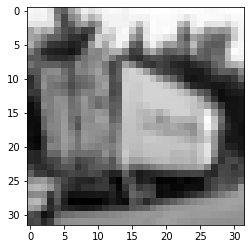

In [ ]:
# Displaying the image
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
for images,labels in trainloader:
  print(images.shape)
  print(labels[0])
  print(classes[labels[0]])
  plt.imshow(images[3][2],cmap='gray')
  break

###9.2 CNN Tutorial --> Training a Classifier (from PyTorch documentation)

1. Load and normalizing the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset=torchvision.datasets.CIFAR10(root='./data',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=0)

testset=torchvision.datasets.CIFAR10(root='./data',download=True,train=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=0)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5)
    self.fc1=nn.Linear(5*5*16,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
  
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,16*5*5)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001)
print('Model training has started')
epochs = 4
for j in range(epochs):
  running_loss=0.0
  for images,labels in trainloader:
    optimizer.zero_grad()
    
    outputs=net(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
    if j%2000==199:
      print(f'Loss is {running_loss/2000:.4f} and Epoch is {j+1,i+1}')
      running_loss=0.0

print('Finished training...')

Files already downloaded and verified
Files already downloaded and verified
Model training has started
Finished training...


Testing the network...


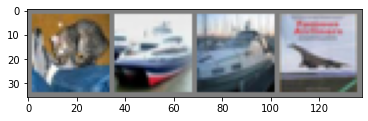

1. cat
2. ship
3. ship
4. plane


1. ship
2. truck
3. cat
4. plane
Accuracy of the network 44.23


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# imshow(torchvision.utils.make_grid(images))
# print(images.shape)
# print(images[1].shape)
# image=images[1].view(-1,32)
# print(image.shape)


print('Testing the network...')

path='./cifar_net.pth'
# print(net.state_dict())

torch.save(net.state_dict(),path)

testiter=iter(testloader)
image_test,labels_test=testiter.next()
imshow(torchvision.utils.make_grid(image_test))

for j in range(4):
  print(f'{j+1}. {classes[labels_test[j]]}')

net=Net()
net.load_state_dict(torch.load(path))
output_test=net(image_test)

_,predicted=torch.max(outputs,1)
print('\n')
for j in range(4):
  print(f'{j+1}. {classes[predicted[j]]}')

correct=0
total=0
with torch.no_grad():
  for images,labels in testloader:
    outputs=net(images)
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

print(f'Accuracy of the network {correct*100/total}')


#10. Transfer Learning

###Tid-bits for The Brain
Various architectures of CNNs:
1. LeNet
2. AlexNet
3. VGGNet
4. GoogLeNet
5. ResNet
6. ZFNet



#Yann LeCun's Deep Learning Course at CDS - NYU Center for Data Science

URL : https://cds.nyu.edu/deep-learning/

Check out https://twitter.com/alfcnz for more Deep Learning materials

Things to search :
1. Linear Algebra (from:alfcnz)
2. SVD (from:alfcnz)
3. (from:alfcnz)

# PyTorch tutorials from the official website of PyTorch

URL : https://www.pytorch.org/tutorials

* CUDA Tensors
* Tensor Operations
* Numpy to PyTorch Tensors and vice-versa

In [ ]:
import torch
import time

a=torch.ones(5,dtype=torch.float32) # Tensor array of ones of size 1x5 (row,column)
b=torch.ones(5,dtype=torch.float32)
# print(a)
# b=a.numpy()
# print(b,type(b))

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print(device)
a=a.to(device)
start=time.time()
a.add_(1)
end=time.time()
GPU_time=end-start
print(f'{a} and the time taken is {GPU_time} using CUDA')

start=time.time()
b.add_(1)
end=time.time()
CPU_time=end-start
print(f'{b} and the time taken is {CPU_time} using CPU')

diff=GPU_time-CPU_time
print(f'\nThe difference the timings between GPU and the CPU is {diff}')  # Negative value indicates GPU is faster


tensor([2., 2., 2., 2., 2.], device='cuda:0') and the time taken is 0.006888866424560547 using CUDA
tensor([2., 2., 2., 2., 2.]) and the time taken is 0.007482767105102539 using CPU

The difference the timings between GPU and the CPU is -0.0005939006805419922


* AUTOGRAD: AUTOMATIC DIFFERENTIATION

Jacobian matrix is used here for computing gradients (for more info visit the official documentation)

In [ ]:
c=torch.ones(2,2,requires_grad=True,device=device)
# print(c)
d=c+2
# print(d)
# print(d.grad_fn)
e=d*d*3
out=e.mean()
print(f'{e}\n{out}')
out.backward()
print(c.grad)

tensor([[27., 27.],
        [27., 27.]], device='cuda:0', grad_fn=<MulBackward0>)
27.0
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]], device='cuda:0')


* NEURAL NETWORKS

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,6,3)
    self.conv2=nn.Conv2d(6,16,3)
    self.fc1=nn.Linear(16*6*6,120)  # 6x6 image dimension
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x=F.max_pool2d(F.relu(self.conv2(x)),2)
    x=x.view(-1,self.num_flat_features(x))
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x
  
  def num_flat_features(self,x):
    size=x.size()[1:]
    num_features=1
    for s in size:
      num_features*=s
    return num_features

net=Net()
net=net.to(device)
print(net)

input=torch.randn(1,1,32,32,device=device)
out=net(input)
print(out)
net.zero_grad()
out.backward(torch.randn(1,10,device=device))

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
tensor([[-0.0482,  0.0443, -0.1417, -0.0351,  0.1563, -0.0015, -0.0325,  0.1210,
          0.0991,  0.0425]], device='cuda:0', grad_fn=<AddmmBackward>)


In [ ]:
output=net(input)
target=torch.randn(10,device=device)
# print(target.size())  # 10 elements
target=target.view(1,-1)
# print(target.size())  # 1 row and 10 columns

criterion=nn.MSELoss()
loss=criterion(output,target)
print(loss)

# net.zero_grad()
# print('conv1.bias.grad before backward')
# print(net.conv1.bias.grad)

# print('conv1.bias.grad after backward')
# print(net.conv1.bias.grad)

optimizer=optim.SGD(net.parameters(),lr=0.01)
optimizer.zero_grad()
loss.backward()
optimizer.step()

output1=net(input)
print(criterion(output1,target))

tensor(1.2766, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(1.2487, device='cuda:0', grad_fn=<MseLossBackward>)


* Training a Classifier

Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10


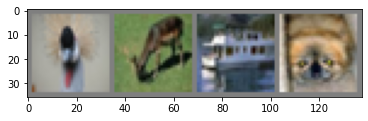

bird deer ship dog


In [1]:
import torch
import torchvision
from torchvision import transforms,datasets
import matplotlib.pyplot as plt
import numpy as np

device='cuda' if torch.cuda.is_available else 'cpu'
# device='cpu'
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset=datasets.CIFAR10(root='./cifar10',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)

testset=datasets.CIFAR10(root='./cifar10',download=False,train=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

classes=('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  img=img/2+0.5
  img_nmp=img.numpy()
  plt.imshow(np.transpose(img_nmp,(1,2,0)))
  plt.show()

dataiter=iter(trainloader)
images,labels=dataiter.next()

# images=images.to(device)
# labesl=labels.to(device)

imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,16*5*5)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

net=Net()
net=net.to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [2]:
for epochs in range(8):
  running_loss=0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    optimizer.zero_grad()
    inputs=inputs.to(device)
    labels=labels.to(device)
    outputs=net(inputs)
    loss=criterion(outputs,labels)
    loss.backward()

    optimizer.step()
    running_loss+=loss.item()
    if i%2000==1999:
      print(f'Loss is {running_loss/2000}')
      running_loss=0.0
print('Finished training')


Loss is 2.208434418261051
Loss is 1.8826022394299506
Loss is 1.680800468608737
Loss is 1.559742550164461
Loss is 1.5340223969221116
Loss is 1.467090305812657
Loss is 1.4135737883597612
Loss is 1.3853771508038044
Loss is 1.334416784852743
Loss is 1.3424547315463424
Loss is 1.3175785332173109
Loss is 1.2816993431150914
Loss is 1.1818959454968572
Loss is 1.2078162886276842
Loss is 1.2268504662103952
Loss is 1.2202537430226803
Loss is 1.1830343977361917
Loss is 1.1700046619027853
Loss is 1.1173738114023581
Loss is 1.1341722214482726
Loss is 1.0916681643365882
Loss is 1.1064972950173542
Loss is 1.1184839054904878
Loss is 1.0751645662970841
Loss is 1.0361484834672883
Loss is 1.0255279665188863
Loss is 1.0353520138906316
Loss is 1.0395365140251815
Loss is 1.030663953644689
Loss is 1.0592026548720896
Loss is 0.9604749761680141
Loss is 0.9727432198198512
Loss is 0.9842797909500077
Loss is 1.0035415520165116
Loss is 1.0021957889683544
Loss is 0.9907215252616443
Loss is 0.931531649030745
Loss is 

In [17]:
print(torch.cuda.get_device_name())

path='./cifar10.pth'
torch.save(net.state_dict(),path)

Tesla P100-PCIE-16GB


In [18]:
net_1=Net()
net_1.load_state_dict(torch.load(path))
# print(net_1.state_dict())


<All keys matched successfully>

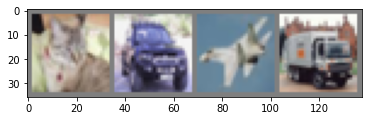


 Real Label is cat | car | plane | truck

 What did it guess? dog | car | plane | truck

 Loss :  0.3969501852989197


In [24]:
test=iter(testloader)
test.next()
test.next()
test_input,test_label=test.next()
imshow(torchvision.utils.make_grid(test_input))
test_input,test_label = test_input.to(device),test_label.to(device)

print('\n Real Label is',' | '.join('%s'%classes[test_label[j]] for j in range(4)))

with torch.no_grad():
  test_output=net(test_input)
  # print(test_label)
  loss=criterion(test_output,test_label)
  _,predicted=torch.max(test_output,1)
  # print(_,predicted)
  print('\n What did it guess?',' | '.join('%s' % classes[predicted[j]] for j in range(4)))
  print('\n Loss : ',loss.item())

In [30]:
print(test_label)
print(predicted)
print((predicted==test_label).sum())

tensor([3, 1, 0, 9], device='cuda:0')
tensor([5, 1, 0, 9], device='cuda:0')
tensor(3, device='cuda:0')
